<a href="https://colab.research.google.com/github/Thonyta17/Econ-5200/blob/main/Assignment%201/Econ_5200_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Phase 1: Prepare (Logic & Control Flow)**

In [ ]:
student_basket = [
    {'Item': 'Tuition', 'Price_2016': 45000, 'Price_2024': 58000},
    {'Item': 'Rent', 'Price_2016': 1200, 'Price_2024': 1800},
    {'Item': 'Burrito', 'Price_2016': 7.50, 'Price_2024': 11.50},
    {'Item': 'Starbucks', 'Price_2016':3.50, 'Price_2024':7.50}
]


In [ ]:
# Define the "Machine" (Function)
def calculate_inflation(base, current):
    return ((current - base) / base) * 100

# Run the Loop
for item in student_basket:
    rate = calculate_inflation(item['Price_2016'], item['Price_2024'])
    print(f"{item['Item']}: {rate:.2f}% Inflation")

Tuition: 28.89% Inflation
Rent: 50.00% Inflation
Burrito: 53.33% Inflation
Starbucks: 114.29% Inflation


**Phase 2: Process (The API Pipeline)**

In [ ]:
!pip install fredapi
from fredapi import Fred
fred = Fred (api_key = '')

# Fetch Series
official_cpi = fred.get_series('CPIAUCSL')
tuition = fred.get_series('CUSR0000SEEB')
rent = fred.get_series('CUSR0000SEHA')
burrito = fred.get_series('CUSR0000SEFV')
starbucks = fred.get_series('CPIFABSL')

In [ ]:
import pandas as pd

dict = ({'CPI':official_cpi, 'Tuition':tuition, 'Rent':rent, 'Burrito':burrito, 'Starbucks':starbucks})

df =pd.DataFrame(dict)
df = df.dropna()

#filter df to start at 2016
df= df.tail(12*(2025-2015)-1)
df

,CPI,Tuition,Rent,Burrito,Starbucks
2016-01-01,237.652,699.997,291.700,259.958,247.967
2016-02-01,237.336,701.688,292.617,260.319,248.244
2016-03-01,238.080,703.289,293.471,260.883,247.699
2016-04-01,238.992,704.842,294.397,261.517,247.906
2016-05-01,239.557,706.506,295.371,262.074,247.575
...,...,...,...,...,...
2025-07-01,322.132,893.568,436.152,383.808,336.718
2025-08-01,323.364,895.305,437.462,384.909,338.285
2025-09-01,324.368,897.302,438.322,385.451,339.115
2025-11-01,325.031,902.001,438.875,387.202,339.362


Define value in 2016 and normalize the df

In [ ]:
Value_at_2016 = df.iloc[0]
Value_at_2016
df_normalized = (df / Value_at_2016) * 100
df_normalized

,CPI,Tuition,Rent,Burrito,Starbucks
2016-01-01,100.000000,100.000000,100.000000,100.000000,100.000000
2016-02-01,99.867032,100.241572,100.314364,100.138869,100.111708
2016-03-01,100.180095,100.470288,100.607131,100.355827,99.891921
2016-04-01,100.563850,100.692146,100.924580,100.599712,99.975400
2016-05-01,100.801592,100.929861,101.258485,100.813978,99.841914
...,...,...,...,...,...
2025-07-01,135.547776,127.653119,149.520740,147.642311,135.791456
2025-08-01,136.066181,127.901262,149.969832,148.065841,136.423395
2025-09-01,136.488647,128.186549,150.264655,148.274337,136.758117
2025-11-01,136.767627,128.857838,150.454234,148.947907,136.857727


**Phase 3: Analyze (The Index Theory & Visualization)**

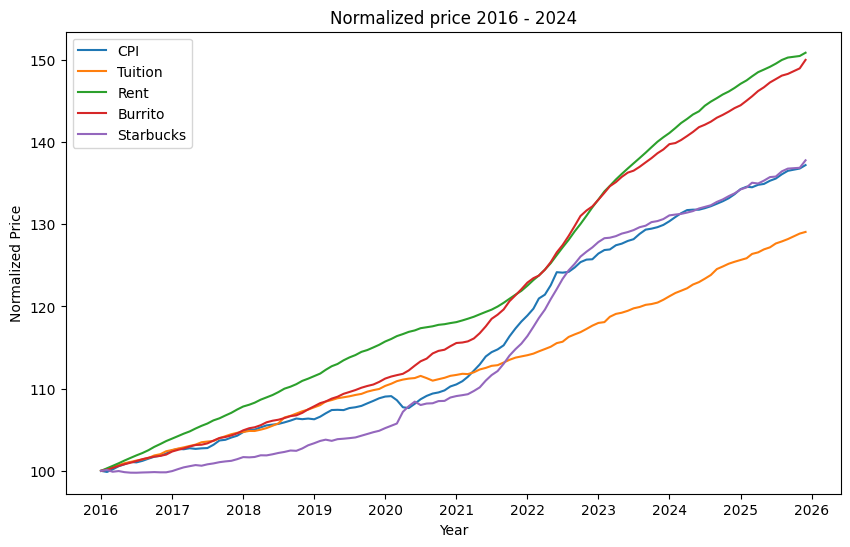

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(df_normalized)
plt.title("Normalized price 2016 - 2024")
plt.xlabel("Year")
plt.ylabel("Normalized Price")
plt.legend(df_normalized.columns)
plt.show()

define weight dictionary and add student SPI column

In [ ]:
weight = {
    'CPI':0.34,
    'Tuition':0.4,
    'Rent':0.1,
    'Burrito':0.01,
    'Starbucks':0.02
}

In [ ]:
#create student spi column with value 0
df_normalized['Student SPI'] = 0

for item, weight in weight.items():
  if item in df_normalized.columns:
    df_normalized['Student SPI'] += df_normalized[item]*weight

df_normalized

,CPI,Tuition,Rent,Burrito,Starbucks,Student SPI
2016-01-01,100.000000,100.000000,100.000000,100.000000,100.000000,87.000000
2016-02-01,99.867032,100.241572,100.314364,100.138869,100.111708,87.086479
2016-03-01,100.180095,100.470288,100.607131,100.355827,99.891921,87.311457
2016-04-01,100.563850,100.692146,100.924580,100.599712,99.975400,87.566530
2016-05-01,100.801592,100.929861,101.258485,100.813978,99.841914,87.775312
...,...,...,...,...,...,...
2025-07-01,135.547776,127.653119,149.520740,147.642311,135.791456,116.291817
2025-08-01,136.066181,127.901262,149.969832,148.065841,136.423395,116.629116
2025-09-01,136.488647,128.186549,150.264655,148.274337,136.758117,116.925131
2025-11-01,136.767627,128.857838,150.454234,148.947907,136.857727,117.316185


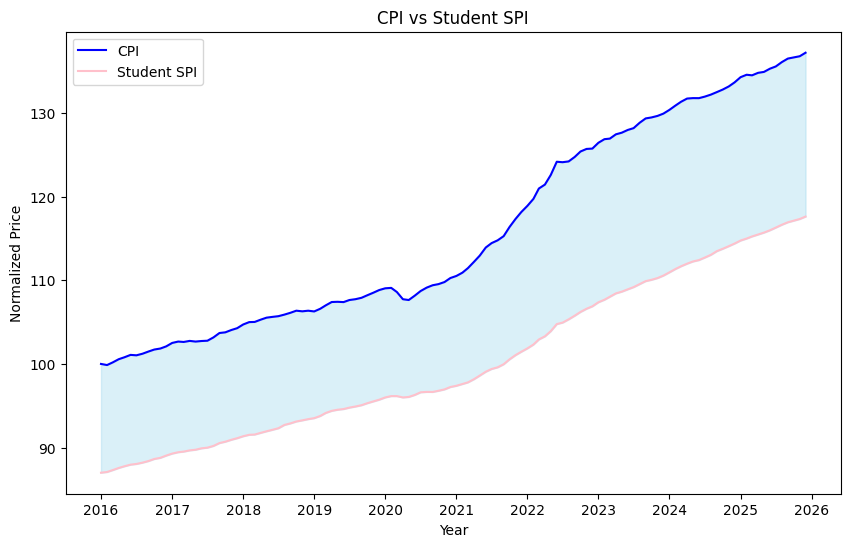

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(df_normalized.index, df_normalized['CPI'],label='CPI',color="blue")
plt.plot(df_normalized.index, df_normalized['Student SPI'],label='Student SPI',color="pink")
plt.xlabel('Year')
plt.ylabel('Normalized Price')
plt.title('CPI vs Student SPI')
plt.legend()
plt.fill_between(df_normalized.index, df_normalized['CPI'], df_normalized['Student SPI'], color='skyblue', alpha=0.3)
plt.show()

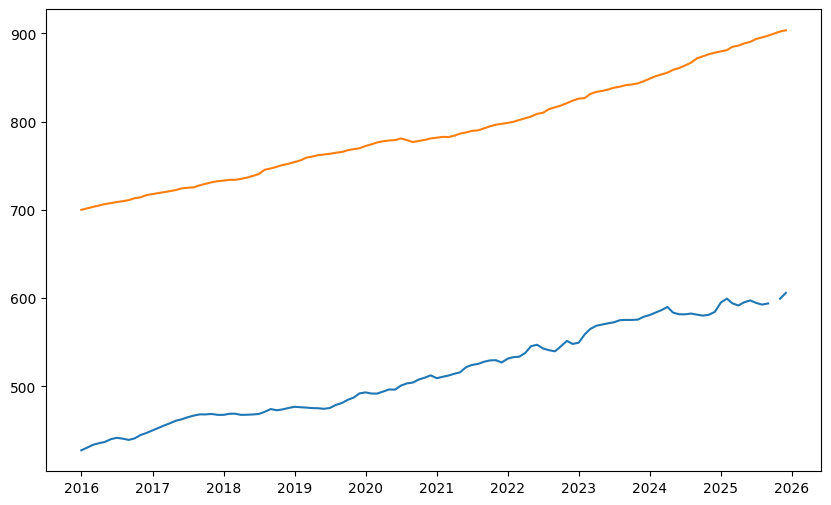

In [ ]:
streaming = fred.get_series('CUSR0000SERA02')
streaming_filtered = streaming.tail(12*(2025-2015))


plt.figure(figsize=(10,6))
plt.plot(streaming_filtered, label = 'Streaming')
plt.plot(df.index, df['Tuition'], label = 'Tuition')

why comparing raw indices with different base years (e.g., 1982 vs 2002) is a "Data Crime."

comparing non_normalized data with different base year is misleading because the values are not measured at the same scale. Price today is not the same value as price yesterday due to inflation so comparing price from different year will not show the accurate picture. An index with an older base year will obviously be much larger than one with a newer base year, It may look like an item is much more expensive than the other when in reality it is just set to different base year. Hence, without normalization to a common base year, there will be misconception of economic meaning from the comparison and incorrect conclusion will be made which is a "Data Crime".

**Phase 4: AI Expansion (The Co-Pilot Era)**

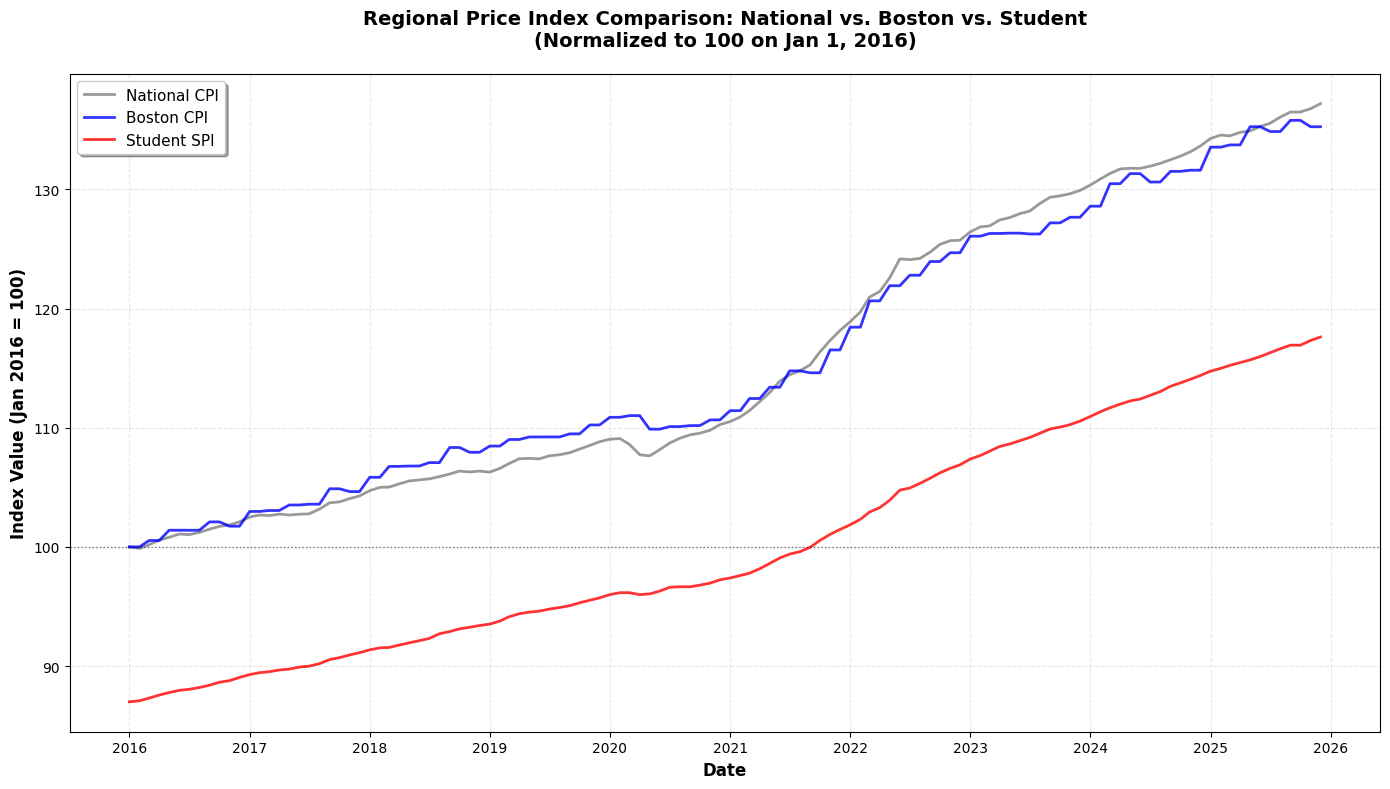


MACROECONOMIC DISPARITY ANALYSIS SUMMARY

Cumulative Change from Jan 2016 to 2025-12-01:
  National CPI:  37.19% increase
  Boston CPI:    35.25% increase
  Student SPI:   17.61% increase

Regional Disparity Analysis:
  Boston vs National: -1.93 percentage points
  Student vs National: -19.58 percentage points
  Student vs Boston: -17.65 percentage points



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from fredapi import Fred

# Initialize FRED API (replace 'your_api_key' with your actual API key)
# Get a free API key at: https://fred.stlouisfed.org/docs/api/api_key.html
fred = Fred(api_key='c50e6b55f0fdbbb8e3288e86fce8e713')

# Fetch Boston CPI data
# FRED Series: CUURA103SA0 - CPI for All Urban Consumers: All Items in Boston-Cambridge-Newton
boston_cpi = fred.get_series('CUURA103SA0')

# Convert to DataFrame
boston_df = pd.DataFrame(boston_cpi, columns=['Boston_CPI_Raw'])

# Handle missing values (forward fill for monthly/bimonthly data)
boston_df['Boston_CPI_Raw'] = boston_df['Boston_CPI_Raw'].ffill()

# Re-index to January 1, 2016 = 100
base_date = '2016-01-01'
if base_date in boston_df.index:
    base_value = boston_df.loc[base_date, 'Boston_CPI_Raw']
    boston_df['Boston_CPI'] = (boston_df['Boston_CPI_Raw'] / base_value) * 100
else:
    # If exact date not available, use closest date
    closest_date = boston_df.index[boston_df.index.get_indexer([pd.Timestamp(base_date)], method='nearest')[0]]
    base_value = boston_df.loc[closest_date, 'Boston_CPI_Raw']
    boston_df['Boston_CPI'] = (boston_df['Boston_CPI_Raw'] / base_value) * 100
    print(f"Note: Using {closest_date.date()} as base date (closest to 2016-01-01)")

# Merge with existing df_normalized
# Assuming df_normalized has a DateTimeIndex
df_comparison = df_normalized.copy()
df_comparison = df_comparison.join(boston_df[['Boston_CPI']], how='outer')

# Handle any remaining missing values after merge
df_comparison = df_comparison.ffill().bfill()

# Verify required columns exist
required_cols = ['CPI', 'Student SPI', 'Boston_CPI']
missing_cols = [col for col in required_cols if col not in df_comparison.columns]
if missing_cols:
    raise ValueError(f"Missing required columns in df_normalized: {missing_cols}. "
                     f"Available columns: {df_normalized.columns.tolist()}")

# Filter data to start from 2016
df_comparison = df_comparison[df_comparison.index >= '2016-01-01']

# Create the comparison plot
plt.figure(figsize=(14, 8))

# Plot three lines
plt.plot(df_comparison.index, df_comparison['CPI'],
         color='grey', linewidth=2, label='National CPI', alpha=0.8)
plt.plot(df_comparison.index, df_comparison['Boston_CPI'],
         color='blue', linewidth=2, label='Boston CPI', alpha=0.8)
plt.plot(df_comparison.index, df_comparison['Student SPI'],
         color='red', linewidth=2, label='Student SPI', alpha=0.8)

# Formatting
plt.title('Regional Price Index Comparison: National vs. Boston vs. Student\n(Normalized to 100 on Jan 1, 2016)',
          fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Date', fontsize=12, fontweight='bold')
plt.ylabel('Index Value (Jan 2016 = 100)', fontsize=12, fontweight='bold')
plt.legend(loc='upper left', fontsize=11, frameon=True, shadow=True)
plt.grid(True, alpha=0.3, linestyle='--')
plt.tight_layout()

# Add horizontal reference line at 100
plt.axhline(y=100, color='black', linestyle=':', linewidth=1, alpha=0.5)

# Display the plot
plt.show()

# Print summary statistics for macroeconomic analysis
print("\n" + "="*60)
print("MACROECONOMIC DISPARITY ANALYSIS SUMMARY")
print("="*60)

# Calculate cumulative changes from base (2016-01-01)
latest_date = df_comparison.index[-1]
print(f"\nCumulative Change from Jan 2016 to {latest_date.date()}:")
print(f"  National CPI:  {df_comparison['CPI'].iloc[-1] - 100:.2f}% increase")
print(f"  Boston CPI:    {df_comparison['Boston_CPI'].iloc[-1] - 100:.2f}% increase")
print(f"  Student SPI:   {df_comparison['Student SPI'].iloc[-1] - 100:.2f}% increase")

# Calculate regional disparity
regional_gap = df_comparison['Boston_CPI'].iloc[-1] - df_comparison['CPI'].iloc[-1]
student_gap = df_comparison['Student SPI'].iloc[-1] - df_comparison['CPI'].iloc[-1]

print(f"\nRegional Disparity Analysis:")
print(f"  Boston vs National: {regional_gap:+.2f} percentage points")
print(f"  Student vs National: {student_gap:+.2f} percentage points")
print(f"  Student vs Boston: {student_gap - regional_gap:+.2f} percentage points")

print("\n" + "="*60)